In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Read data from preprocessed file

In [2]:
df = pd.read_csv("./IT Salary 2018_2019_2020_processed.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: './IT Salary 2018_2019_2020_processed.csv'

# Question 2
## What is the age distribution in the IT field in the years 2018 - 2020?
### Meaning
- Know how the number of young people and veterans in the industry is distributed
- Knowing if you get older will gradually eliminate it or not
- Know the industry's level of rejection
### Answering
    Using histogram to visualize the distribution of salaries of each level below:

#### #Visualize

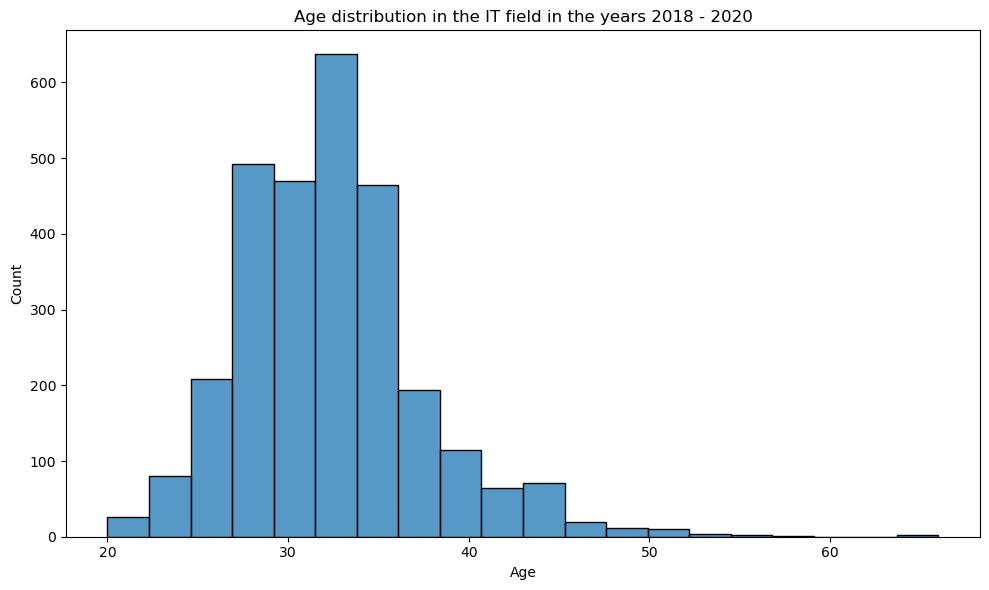

In [32]:
plt.figure(figsize=(10, 6))  # Kích thước của biểu đồ

# Sử dụng seaborn để vẽ histogram của 'Age'
sns.histplot(x='Age', data=df, bins=20)  

plt.title('Age distribution in the IT field in the years 2018 - 2020')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Question 3
## What does the correlation between years of experience and salary look like? Does salary increase with years of experience?
### Meaning
- Know the correlation between salary and years of experience.
- Know the salary evolution at different experience levels
### Answering
    Using scatter plot to visualize the distribution of salaries of each level below:

#### #Visualize

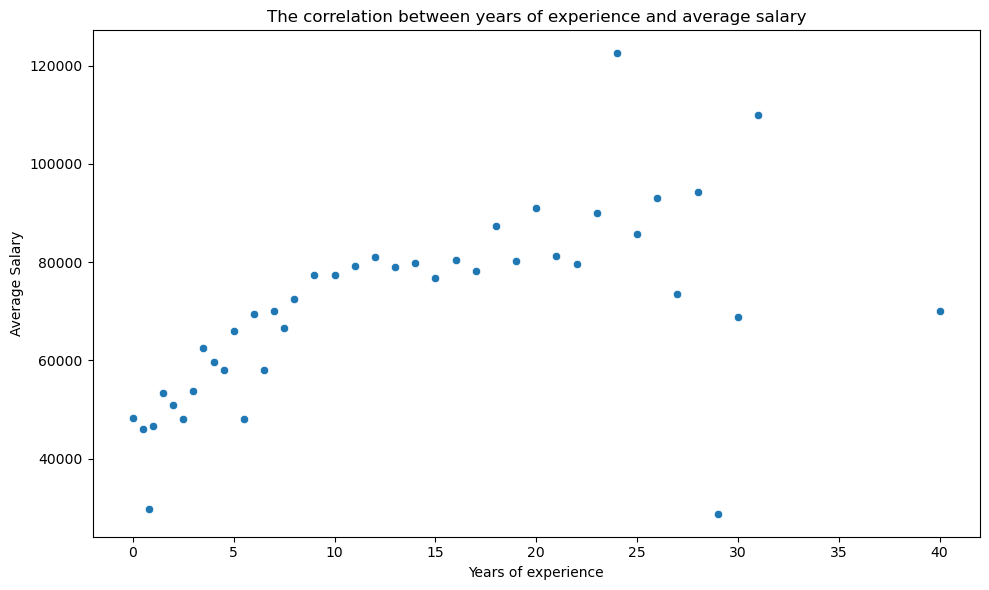

In [33]:
# Tính lương trung bình theo mức lương
average_salary = df.groupby('Years of experience')['Current Salary'].mean().reset_index(name='Average Salary')

# Vẽ scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of experience', y='Average Salary', data=average_salary)

plt.title('The correlation between years of experience and average salary')
plt.xlabel('Years of experience')
plt.ylabel('Average Salary')

plt.tight_layout()
plt.show()

After visualizing, i see:
- From 0 to 10 year of experiences: Salary increased very high and doubled compared to the beginning
- From 10 to 20 year of experiences: Salary changes less frequently and is usually concentrated at 80,000 USD per year
- From 20 to 30 year of experiences: Salaries began to change dramatically and increase higher, however, the number of people with this level of experience also gradually decreased

# Question 4
## Which positions have the highest and lowest salaries in the IT field in 2018 - 2020?
### Meaning
- Know the positions with the highest salary and if young generation do not have much orientation in the IT field, they can consider these positions.
- In contrast to the highest salary position, if the younger generation does not have a direction, they can consider other positions for higher salaries.
### Answering
    Using bar plot to visualize the distribution of salaries of each level below:

#### #Preprocessing before visualize

In [131]:
df = df.drop(df[df['Position'] == 'Lawyer '].index)

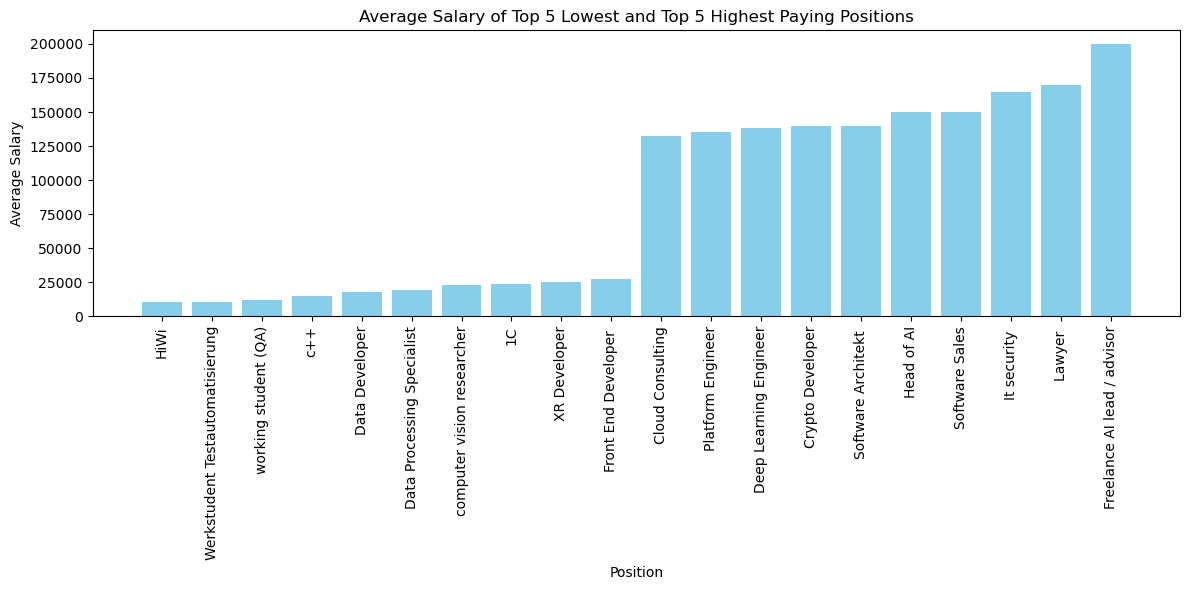

In [92]:

average_salary_by_position = df.groupby('Position')['Current Salary'].mean().reset_index()

# sort Salary 
average_salary_by_position = average_salary_by_position.sort_values(by='Current Salary')

# Select top 10 and bottom 10
lowest_salary_positions = average_salary_by_position.head(10)
highest_salary_positions = average_salary_by_position.tail(10)

selected_positions = pd.concat([lowest_salary_positions, highest_salary_positions])

# draw bar chart
plt.figure(figsize=(12, 6))
plt.bar(selected_positions['Position'], selected_positions['Current Salary'], color='skyblue')
plt.title('Average Salary of Top 5 Lowest and Top 5 Highest Paying Positions')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
